In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

np.random.seed(42)
x,y = make_regression(n_samples=100, n_features=10, noise=15)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Coefficients:", lasso.coef_)
print('MSE:', mean_squared_error(y_test, y_pred))


Coefficients: [19.32881673 54.39863242  1.28516306 62.77658128 90.86748953 68.08330475
 82.13531373  6.09713491  2.03182365 70.08137905]
MSE: 277.80370769992436


Coefficients: [84.34943308 72.48795026]
MSE: 352.30040298550495


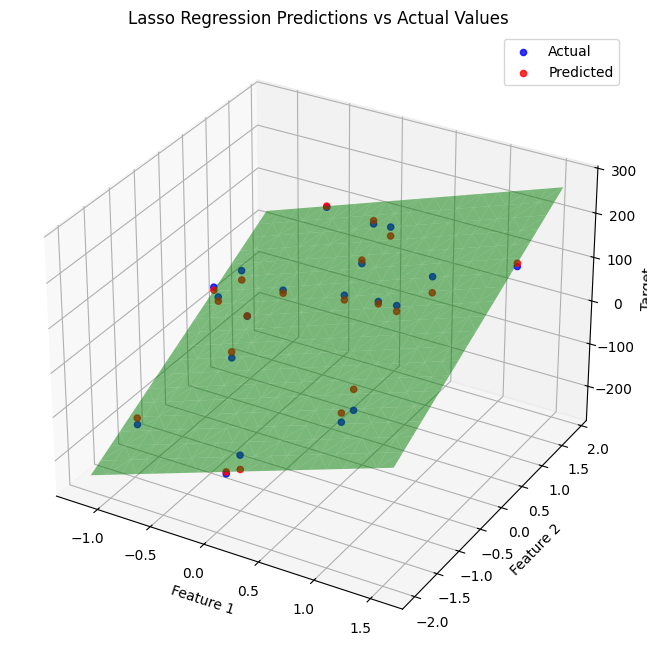

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate sample regression data with only 2 features for 3D plotting
X, y = make_regression(n_samples=100, n_features=2, noise=15)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Output
print("Coefficients:", lasso.coef_)
print('MSE:', mean_squared_error(y_test, y_pred))

# Extract test features
x1_test = X_test[:, 0]
x2_test = X_test[:, 1]

# Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_test, x2_test, y_test, color='blue', label='Actual', alpha=0.8)
ax.scatter(x1_test, x2_test, y_pred, color='red', label='Predicted', alpha=0.8)

# Create prediction surface
x1_range = np.linspace(x1_test.min(), x1_test.max(), 20)
x2_range = np.linspace(x2_test.min(), x2_test.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack((x1_grid.flatten(), x2_grid.flatten()))
y_grid = lasso.predict(X_grid)

# Surface plot
ax.plot_trisurf(x1_grid.flatten(), x2_grid.flatten(), y_grid,
                color='green', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Lasso Regression Predictions vs Actual Values')
ax.legend()
plt.show()
